# All Sites Random Forest: Unloading Paper
## Plots related to the random forest results, and used to make manuscript figures
* plotting the data from the random forest notebook #1

created by Cassie Lumbrazo\
date: July 2024
python environment: **random_forest**


In [5]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

from scipy import stats
from scipy.stats import norm

In [6]:
# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

### Load the dataset

In [75]:
local_path = "/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/Python/"
df_unload = pd.read_csv(local_path + "allsites_snowunload.csv")
df_unload.head()

datetime  shortwave  longwave  windspeed      RH   temp    A  \
0  2016-10-06 06:00:00       4.93   297.470      1.180  96.650 -3.495  1.0   
1  2016-10-06 07:00:00      29.43   298.655      1.735  93.195 -3.325  1.0   
2  2016-10-06 08:00:00     124.50   309.965      2.080  83.190 -2.430  1.0   
3  2016-10-06 09:00:00     102.04   306.465      2.745  90.135 -3.250  1.0   
4  2016-10-06 10:00:00     614.38   240.145      4.595  80.390 -3.350  1.0   

     B   CD    E  Type Class Snow      Sunlit Classification  Typesymbol  \
0  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
1  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
2  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
3  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
4  1.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   

   Snowsymbol   site  pressure  snowdepth  
0       128.0  niwot       NaN        NaN  
1       128.0  niwot       NaN        NaN  
2       128.0  niwot       NaN        NaN  
3       128.0  niwot       NaN        NaN  
4       128.0  niwot       NaN        NaN

In [76]:
df_unload.Classification.value_counts()

Classification
Snow Staying      1288
Snow Unloading     446
Name: count, dtype: int64

## Let's look at how much of each site's data is in the low vs high shortwave splits 

In [78]:
df = df_unload.copy(deep=True)
df

datetime   shortwave  longwave  windspeed         RH  \
0     2016-10-06 06:00:00    4.930000   297.470   1.180000  96.650000   
1     2016-10-06 07:00:00   29.430000   298.655   1.735000  93.195000   
2     2016-10-06 08:00:00  124.500000   309.965   2.080000  83.190000   
3     2016-10-06 09:00:00  102.040000   306.465   2.745000  90.135000   
4     2016-10-06 10:00:00  614.380000   240.145   4.595000  80.390000   
...                   ...         ...       ...        ...        ...   
1729  2021-05-03 07:00:00  400.306250       NaN   0.770125  73.653583   
1730  2021-05-03 08:00:00  605.846250       NaN   0.973554  63.681542   
1731  2021-05-03 09:00:00  854.292500       NaN   1.648042  57.207667   
1732  2021-05-03 10:00:00  902.823333       NaN   1.427383  48.749292   
1733  2021-05-03 11:00:00  948.237500       NaN   1.719404  46.537750   

          temp    A    B   CD    E  Type   Class  Snow         Sunlit  \
0    -3.495000  1.0  0.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
1    -3.325000  1.0  0.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
2    -2.430000  1.0  0.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
3    -3.250000  1.0  0.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
4    -3.350000  1.0  1.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
...        ...  ...  ...  ...  ...   ...     ...   ...            ...   
1729  2.143021  1.0  0.0  1.0  0.0   NaN     NaN   NaN     Not Sunlit   
1730  3.865325  1.0  0.0  1.0  1.0   NaN     NaN   NaN  Sunlit Canopy   
1731  4.049008  1.0  0.0  0.0  1.0   2.0  tempsw  melt  Sunlit Canopy   
1732  4.768171  1.0  0.0  0.0  1.0   2.0  tempsw  melt  Sunlit Canopy   
1733  4.717921  1.0  0.0  0.0  1.0   2.0  tempsw  melt  Sunlit Canopy   

      Classification  Typesymbol  Snowsymbol   site  pressure  snowdepth  
0       Snow Staying       128.0       128.0  niwot       NaN        NaN  
1       Snow Staying       128.0       128.0  niwot       NaN        NaN  
2       Snow Staying       128.0       128.0  niwot       NaN        NaN  
3       Snow Staying       128.0       128.0  niwot       NaN        NaN  
4       Snow Staying       128.0       128.0  niwot       NaN        NaN  
...              ...         ...         ...    ...       ...        ...  
1729    Snow Staying       128.0       128.0  laret       NaN        NaN  
1730    Snow Staying       128.0       128.0  laret       NaN        NaN  
1731  Snow Unloading         2.0         2.0  laret       NaN        NaN  
1732  Snow Unloading         2.0         2.0  laret       NaN        NaN  
1733  Snow Unloading         2.0         2.0  laret       NaN        NaN  

[1734 rows x 20 columns]

In [79]:
df = df.drop(columns=['A','B','E','Type','Class','Snow', 'Sunlit', 'Typesymbol', 'Snowsymbol'])
df = df.drop(columns=['datetime', 'longwave', 'RH', 'pressure', 'snowdepth']) # the major ones
df

shortwave  windspeed      temp   CD  Classification   site
0       4.930000   1.180000 -3.495000  1.0    Snow Staying  niwot
1      29.430000   1.735000 -3.325000  1.0    Snow Staying  niwot
2     124.500000   2.080000 -2.430000  1.0    Snow Staying  niwot
3     102.040000   2.745000 -3.250000  1.0    Snow Staying  niwot
4     614.380000   4.595000 -3.350000  1.0    Snow Staying  niwot
...          ...        ...       ...  ...             ...    ...
1729  400.306250   0.770125  2.143021  1.0    Snow Staying  laret
1730  605.846250   0.973554  3.865325  1.0    Snow Staying  laret
1731  854.292500   1.648042  4.049008  0.0  Snow Unloading  laret
1732  902.823333   1.427383  4.768171  0.0  Snow Unloading  laret
1733  948.237500   1.719404  4.717921  0.0  Snow Unloading  laret

[1734 rows x 6 columns]

In [109]:
# first, create version which splits by SW at 300
df["shortwave_bin"] = pd.cut(df['shortwave'], bins=[-np.inf, 300, np.inf], labels=["less than 300", "greater than 300"])

# then, create a version of the df which splits at -1.5C 
df["temp_bin"] = pd.cut(df['temp'], bins=[-np.inf, -1.5, np.inf], labels=["less than -1.5", "greater than -1.5"])
df.head()

shortwave  windspeed   temp   CD Classification   site SW_bin  \
0       4.93      1.180 -3.495  1.0   Snow Staying  niwot   left   
1      29.43      1.735 -3.325  1.0   Snow Staying  niwot   left   
2     124.50      2.080 -2.430  1.0   Snow Staying  niwot   left   
3     102.04      2.745 -3.250  1.0   Snow Staying  niwot   left   
4     614.38      4.595 -3.350  1.0   Snow Staying  niwot  right   

         temp_bin     shortwave_bin  
0  less than -1.5     less than 300  
1  less than -1.5     less than 300  
2  less than -1.5     less than 300  
3  less than -1.5     less than 300  
4  less than -1.5  greater than 300

In [110]:
# now, we want to create some plots which show us how much of each site is in each of the bins, temp_bin and shortwave_bin
df['temp_bin'].value_counts().plot(kind='bar')

<Axes: xlabel='temp_bin'>

In [112]:
fig = px.histogram(df, x="shortwave_bin",
             color='site', barmode='group',
             height=300, width=600)

fig.show()

In [113]:
fig = px.histogram(df, x="temp_bin",
             color='site', barmode='group',
             height=300, width=600)
fig.show()

# PREVIOUS CODE

### Prepare the dataset

In [10]:
# cannot have any nans for random forest... so let's start by deleting columns we do not need 
df_int = df_unload.copy(deep=True)
df_int = df_int.drop(columns=['datetime', 'longwave', 'RH', 'pressure', 'snowdepth']) # the major ones
df_int.head()

shortwave  windspeed   temp    A    B   CD    E  Type Class Snow  \
0       4.93      1.180 -3.495  1.0  0.0  1.0  0.0   NaN   NaN  NaN   
1      29.43      1.735 -3.325  1.0  0.0  1.0  0.0   NaN   NaN  NaN   
2     124.50      2.080 -2.430  1.0  0.0  1.0  0.0   NaN   NaN  NaN   
3     102.04      2.745 -3.250  1.0  0.0  1.0  0.0   NaN   NaN  NaN   
4     614.38      4.595 -3.350  1.0  1.0  1.0  0.0   NaN   NaN  NaN   

       Sunlit Classification  Typesymbol  Snowsymbol   site  
0  Not Sunlit   Snow Staying       128.0       128.0  niwot  
1  Not Sunlit   Snow Staying       128.0       128.0  niwot  
2  Not Sunlit   Snow Staying       128.0       128.0  niwot  
3  Not Sunlit   Snow Staying       128.0       128.0  niwot  
4  Not Sunlit   Snow Staying       128.0       128.0  niwot

In [11]:
# also drop the ones that are not important right now 
df_int = df_int.drop(columns=['A','B','E','Type','Class','Snow', 'Sunlit', 'Typesymbol', 'Snowsymbol'])
df_int.head()

shortwave  windspeed   temp   CD Classification   site
0       4.93      1.180 -3.495  1.0   Snow Staying  niwot
1      29.43      1.735 -3.325  1.0   Snow Staying  niwot
2     124.50      2.080 -2.430  1.0   Snow Staying  niwot
3     102.04      2.745 -3.250  1.0   Snow Staying  niwot
4     614.38      4.595 -3.350  1.0   Snow Staying  niwot

In [12]:
df_int = df_int.drop(columns=['Classification', 'site'])
df_int.head()

shortwave  windspeed   temp   CD
0       4.93      1.180 -3.495  1.0
1      29.43      1.735 -3.325  1.0
2     124.50      2.080 -2.430  1.0
3     102.04      2.745 -3.250  1.0
4     614.38      4.595 -3.350  1.0

In [13]:
# now, drop na from the very simple dataframe
df_int = df_int.dropna()
len(df_int)

1650

In [14]:
df_int['CD'] =        df_int['CD'].astype(int)
df_int['temp'] =      df_int['temp'].astype(int)
df_int['shortwave'] = df_int['shortwave'].astype(int)
df_int['windspeed'] = df_int['windspeed'].astype(int)

df_int.head()

shortwave  windspeed  temp  CD
0          4          1    -3   1
1         29          1    -3   1
2        124          2    -2   1
3        102          2    -3   1
4        614          4    -3   1

In [15]:
# Finally, we can start the random forest analysis 
# first, we need to split the data into training and testing sets

# create the x, variables, columns
X = df_int.drop(columns=['CD'])
X.head()

shortwave  windspeed  temp
0          4          1    -3
1         29          1    -3
2        124          2    -2
3        102          2    -3
4        614          4    -3

In [16]:
# create the y, predictor, column
y = df_int.CD
y.head()

0    1
1    1
2    1
3    1
4    1
Name: CD, dtype: int32

In [17]:
# x.describe()
X.isnull().values.any()
y.isnull().values.any()

False

# Plotting

#### Calculate staying vs. unloading inside the decision trees 

In [18]:
colorsnow2 = '#7dcfd4' # slightly desaturated cyan

In [19]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
# colorsnow2 = '#2acfd4' # a bit brighter cyan than colorsnow, we will try to see if this looks better on the plots
unloadcolors = [colorsnow, colorsnowunload]
# unloadcolors = [colorsnow2, colorsnowunload]


namesnow = 'snow staying'
namesnowunload = 'snow unloading'
group_labels = ['snow staying', 'snow unloading']


# namelaret = 'Davos Laret, Switzerland'
# nameniwot = 'Niwot Ridge, Colorado, USA'
# namehopper = 'Mount Hopper, Washington, USA'
# namesodankyla = 'Sodankylä, Finland'

namesodankyla = 'A)  Sodankylä, Finland'
namesod = 'A)  Sodankyla, Finland'
namelaret = 'B)  Davos Laret, Switzerland'
nameniwot = 'C)  Niwot Ridge, Colorado, USA'

nametemperature = "air temperature (℃)"
namewindspeed = "wind speed (ms⁻¹)"
nameshortwave = "shortwave radiation (Wm⁻²)"

print(nametemperature)
print(namewindspeed)
print(nameshortwave)

air temperature (℃)
wind speed (ms⁻¹)
shortwave radiation (Wm⁻²)


In [20]:
# building the decision tree from top to bottom, row one through three (l:left, to r:right decisions)

# Assigning the Random Forest Result values (change at the top if needed)
# row 1 
shortwave_num1 = 258.0

# row 2 
shortwave_num2 = 57.5
temperture_num2 = -2.5 

# row 3 
windspeed_num3_left = 3.5 
temperature_num3_left = 0.5
windspeed_num3_right = 5.5
temperature_num3_right=1.5 


# Breaking up the data
# row one 
df_l = df_unload.where((df_unload.shortwave <= shortwave_num1))
df_r = df_unload.where((df_unload.shortwave >  shortwave_num1))

# row two
df_ll = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2)) 
df_lr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2))
df_rl = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp      <= temperture_num2))
df_rr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp      >  temperture_num2))

# row three
df_lll = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2) & (df_unload.windspeed <=  windspeed_num3_left))  
df_llr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave <= shortwave_num2) & (df_unload.windspeed >   windspeed_num3_left))

df_lrl = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2) & (df_unload.temp     <= temperature_num3_left))
df_lrr = df_unload.where((df_unload.shortwave <= shortwave_num1) & (df_unload.shortwave >  shortwave_num2) & (df_unload.temp     >  temperature_num3_left))

df_rll = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp <= temperture_num2)     & (df_unload.windspeed <=  windspeed_num3_right)) 
df_rlr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp <= temperture_num2)     & (df_unload.windspeed >   windspeed_num3_right))

df_rrl = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp >  temperture_num2)     & (df_unload.temp     <= temperature_num3_right)) 
df_rrr = df_unload.where((df_unload.shortwave >  shortwave_num1) & (df_unload.temp >  temperture_num2)     & (df_unload.temp     >  temperature_num3_right))

In [21]:
df_r.head()

datetime  shortwave  longwave  windspeed     RH  temp    A    B  \
0                  NaN        NaN       NaN        NaN    NaN   NaN  NaN  NaN   
1                  NaN        NaN       NaN        NaN    NaN   NaN  NaN  NaN   
2                  NaN        NaN       NaN        NaN    NaN   NaN  NaN  NaN   
3                  NaN        NaN       NaN        NaN    NaN   NaN  NaN  NaN   
4  2016-10-06 10:00:00     614.38   240.145      4.595  80.39 -3.35  1.0  1.0   

    CD    E  Type Class Snow      Sunlit Classification  Typesymbol  \
0  NaN  NaN   NaN   NaN  NaN         NaN            NaN         NaN   
1  NaN  NaN   NaN   NaN  NaN         NaN            NaN         NaN   
2  NaN  NaN   NaN   NaN  NaN         NaN            NaN         NaN   
3  NaN  NaN   NaN   NaN  NaN         NaN            NaN         NaN   
4  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   

   Snowsymbol   site  pressure  snowdepth  
0         NaN    NaN       NaN        NaN  
1         NaN    NaN       NaN        NaN  
2         NaN    NaN       NaN        NaN  
3         NaN    NaN       NaN        NaN  
4       128.0  niwot       NaN        NaN

In [22]:
# first, for the entire dataset 
df_staying   = df_unload.where((df_unload.CD == 1)).dropna(how='all') 
df_unloading = df_unload.where((df_unload.CD == 0)).dropna(how='all') 

# node 1
df_l_staying   = df_l.where((df_l.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying 
df_l_unloading = df_l.where((df_l.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading 

df_r_staying   = df_r.where((df_r.CD == 1)).dropna(how='all') 
df_r_unloading = df_r.where((df_r.CD == 0)).dropna(how='all')  

# node 2
df_ll_staying   = df_ll.where((df_ll.CD == 1)).dropna(how='all') 
df_ll_unloading = df_ll.where((df_ll.CD == 0)).dropna(how='all') 

df_lr_staying   = df_lr.where((df_lr.CD == 1)).dropna(how='all') 
df_lr_unloading = df_lr.where((df_lr.CD == 0)).dropna(how='all') 



df_rl_staying   = df_rl.where((df_rl.CD == 1)).dropna(how='all') 
df_rl_unloading = df_rl.where((df_rl.CD == 0)).dropna(how='all') 

df_rr_staying   = df_rr.where((df_rr.CD == 1)).dropna(how='all') 
df_rr_unloading = df_rr.where((df_rr.CD == 0)).dropna(how='all') 


# node 3
df_lll_staying   = df_lll.where((df_lll.CD == 1)).dropna(how='all') 
df_lll_unloading   = df_lll.where((df_lll.CD == 0)).dropna(how='all') 

df_llr_staying   = df_llr.where((df_llr.CD == 1)).dropna(how='all')
df_llr_unloading   = df_llr.where((df_llr.CD == 0)).dropna(how='all')


df_lrl_staying = df_lrl.where((df_lrl.CD == 1)).dropna(how='all')  
df_lrl_unloading = df_lrl.where((df_lrl.CD == 0)).dropna(how='all')

df_lrr_staying = df_lrr.where((df_lrr.CD == 1)).dropna(how='all') 
df_lrr_unloading = df_lrr.where((df_lrr.CD == 0)).dropna(how='all') 



df_rll_staying   = df_rll.where((df_rll.CD == 1)).dropna(how='all') 
df_rll_unloading   = df_rll.where((df_rll.CD == 0)).dropna(how='all') 

df_rlr_staying   = df_rlr.where((df_rlr.CD == 1)).dropna(how='all') 
df_rlr_unloading   = df_rlr.where((df_rlr.CD == 0)).dropna(how='all') 


df_rrl_staying = df_rrl.where((df_rrl.CD == 1)).dropna(how='all') 
df_rrl_unloading = df_rrl.where((df_rrl.CD == 0)).dropna(how='all') 

df_rrr_staying = df_rrr.where((df_rrr.CD == 1)).dropna(how='all') 
df_rrr_unloading = df_rrr.where((df_rrr.CD == 0)).dropna(how='all') 

## Box Plots

Node 1

In [23]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_l_staying.shortwave,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_l_unloading.shortwave, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_r_staying.shortwave,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_r_unloading.shortwave, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('shortwave radiation ≤ 258 Wm⁻²', 'shortwave radiation > 258 Wm⁻²'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=nameshortwave,   row=1, col=1)

fig.show()
# Node 1, all 

Node 2, left side

In [24]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_ll_staying.shortwave,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_ll_unloading.shortwave, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_lr_staying.shortwave,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_lr_unloading.shortwave, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('shortwave radiation ≤ 57.5 Wm⁻²', 'shortwave radiation > 57.5 Wm⁻²'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=nameshortwave,   row=1, col=1)

fig.show()
# NODE 2, left side

Node 2, right side

In [25]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_rl_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_rl_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_rr_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_rr_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('air temperature ≤ -2.5℃', 'air temperature > -2.5℃'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=nametemperature,   row=1, col=1)

fig.show()
# NODE 2, right side

In [26]:
# Node 3 reference 
#  # node 3
# df_lll_staying   = df_lll.where((df_lll.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying 
# df_llr_staying   = df_llr.where((df_llr.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying 

# df_lrl_unloading = df_lrl.where((df_lrl.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading 
# df_lrr_unloading = df_lrr.where((df_lrr.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading 

# df_rll_staying   = df_rll.where((df_rll.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying
# df_rlr_staying   = df_rlr.where((df_rlr.CD == 1)).dropna(how='all') # where CD == 1, meaning Snow Staying 

# df_rrl_unloading = df_rrl.where((df_rrl.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading
# df_rrr_unloading = df_rrr.where((df_rrr.CD == 0)).dropna(how='all') # where CD == 0, meaning Snow Unloading

Node 3, left left

In [27]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_lll_staying.windspeed,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_lll_unloading.windspeed, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_llr_staying.windspeed,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_llr_unloading.windspeed, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('wind speed ≤ 3.5 ms⁻¹', 'wind speed > 3.5 ms⁻¹'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=namewindspeed,   row=1, col=1)

fig.show()
# NODE 3, left left side

Node 3, left right

In [28]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_lrl_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_lrl_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_lrr_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_lrr_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('air temperature ≤ 3.5℃', 'air temperature > 3.5℃'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=nametemperature,   row=1, col=1)

fig.show()
# NODE 3, left right side

Node 3, right left 

In [29]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_rll_staying.windspeed,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_rll_unloading.windspeed, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_rlr_staying.windspeed,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_rlr_unloading.windspeed, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('wind speed ≤ 5.5 ms⁻¹', 'wind speed > 5.5 ms⁻¹'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=namewindspeed,   row=1, col=1)

fig.show()
# NODE 3, right left side

Node 3, right right

In [30]:
marker=2
fig = go.Figure()

# row 1   
trace1 = go.Box(y=df_rrl_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace2 = go.Box(y=df_rrl_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=df_rrr_staying.temp,   name=namesnow,       marker_color=colorsnow,       marker_size=marker, boxpoints='all', showlegend=False)
trace4 = go.Box(y=df_rrr_unloading.temp, name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all', showlegend=False)


fig = make_subplots(rows=1, cols=2, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=('air temperature ≤ 1.5℃', 'air temperature > 1.5℃'))

# shortwave
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 1, col = 2)
fig.append_trace(trace4,  row = 1, col = 2)

fig.update_layout(title='', width=1200, height=500) 

fig.update_yaxes(title_text=nametemperature,   row=1, col=1)

fig.show()
# NODE 3, left right side

In [31]:
nametemperature = "air temperature (℃)"
namewindspeed = "wind speed (ms⁻¹)"
nameshortwave = "shortwave radiation (Wm⁻²)"

print(nametemperature)
print(namewindspeed)
print(nameshortwave)

air temperature (℃)
wind speed (ms⁻¹)
shortwave radiation (Wm⁻²)


## PDFs with ALL the data 

Text(0, 0.5, 'probability of occurance')

c:\Users\Lumbr\miniconda3\envs\random_forest\lib\site-packages\IPython\core\events.py:93: UserWarning:

Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.

c:\Users\Lumbr\miniconda3\envs\random_forest\lib\site-packages\IPython\core\events.py:93: UserWarning:

Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.

c:\Users\Lumbr\miniconda3\envs\random_forest\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from current font.

c:\Users\Lumbr\miniconda3\envs\random_forest\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.



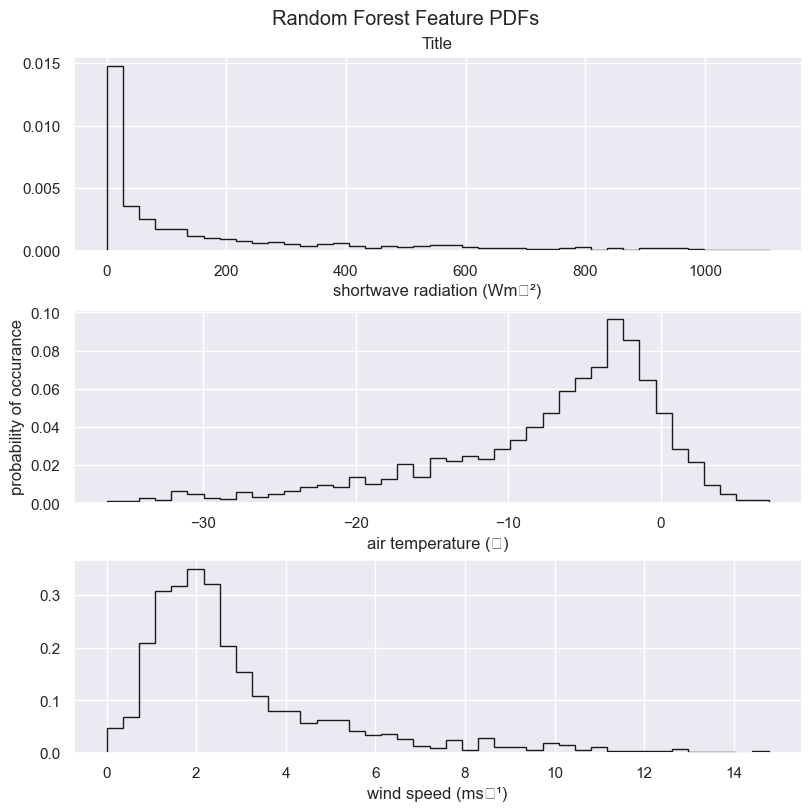

In [32]:
# PDFs of all variables 
fig, axes = plt.subplots(3,1, figsize=(8,8), constrained_layout = True, sharex='row', sharey='row')
fig.suptitle('Random Forest Feature PDFs')

fill_color='grey'

# shortwave 
axes[0].hist(df_unload.shortwave, bins='sqrt', density=True, edgecolor='k', histtype='step')
# axes[0].axvspan(df.dem.min(), 960,  alpha=.3, color=fill_color) # bin 1 


# air temperature
axes[1].hist(df_unload.temp, bins='sqrt', density=True, edgecolor='k', histtype='step')
# axes[1].axvspan(-1, -0.3, alpha=.1, color=color_more)
# axes[1].axvspan(-1, -0.1, alpha=.1, color=color_more)
# axes[1].axvspan(-0.1, 1,  alpha=.1, color=color_less) 

# wind speed
axes[2].hist(df_unload.windspeed, bins='sqrt', density=True, edgecolor='k', histtype='step')
# axes[2].axvspan(-10,-5.0, alpha=.1, color=color_more) 

# if we want text on the screen
# fig.text(0.05, 0.18, 'forest edges \nand forest')


# labels
axes[0].set_title('Title')
axes[0].set_xlabel(nameshortwave)
axes[1].set_xlabel(nametemperature)
axes[2].set_xlabel(namewindspeed)

# fig.text(-0.01, 0.3, 'probability of occurance', rotation=90)
axes[1].set_ylabel('probability of occurance')

# # set limits 
# axes[0].set_xlim([700, 2020])
# axes[1].set_xlim([-1, 1])
# axes[2].set_xlim([-6, 6])
# axes[3].set_xlim([-15, 15])

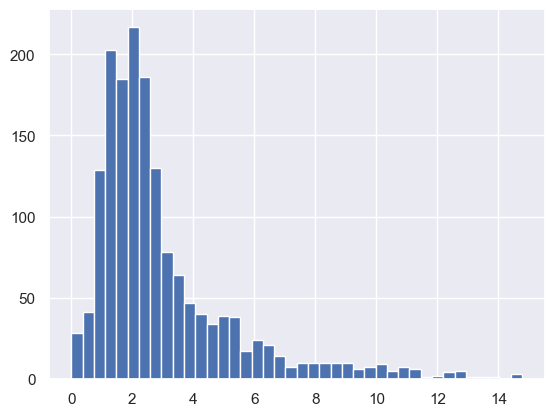

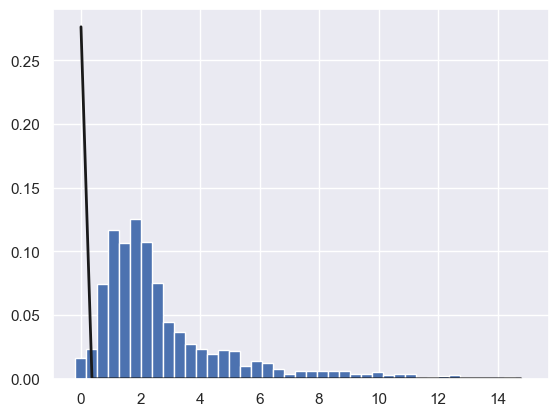

In [33]:
n, bins, patches = plt.hist(df_unload.windspeed, 40, histtype='bar')
plt.show()
n = n/len(df_unload.windspeed)
n = np.append(n, 0)
mu = np.mean(n)
sigma = np.std(n)

plt.bar(bins,n, width=(bins[len(bins)-1]-bins[0])/40)
y1= (1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2 /(2*sigma**2)))*0.03
plt.plot(bins, y1, 'k', linewidth=2)
plt.show()

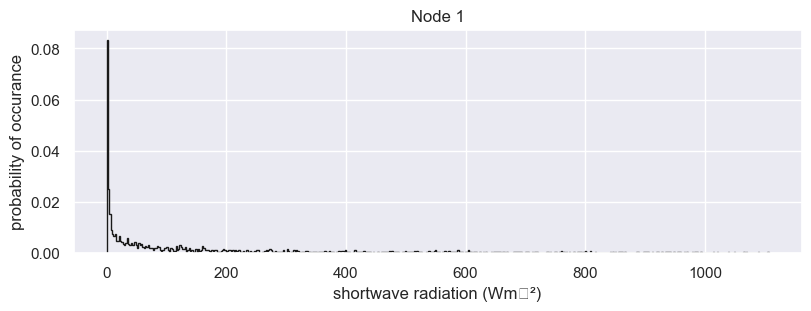

In [34]:
# PDFs of all variables 
fig, axes = plt.subplots(1,1, figsize=(8,3), constrained_layout = True, sharex='row', sharey='row')

fill_color='grey'

# shortwave 
plt.hist(df_unload.shortwave, bins=500, density=True, edgecolor='k', histtype='step')
# axes[0].axvspan(df.dem.min(), 960,  alpha=.3, color=fill_color) # bin 1 

# if we want text on the screen
# fig.text(0.05, 0.18, 'forest edges \nand forest')

# # labels
plt.title('Node 1')
plt.xlabel(nameshortwave)

# # fig.text(-0.01, 0.3, 'probability of occurance', rotation=90)
plt.ylabel('probability of occurance')

plt.show()


In [35]:
def histpdf(x1, x2, binsize, kdeornorm, title, axistitle, showhist, showrug):
    # define data 
    hist_data = [x1, x2]

    # set plot constants 
    group_labels = ['snow staying', 'snow unloading']
    bin_sizes = binsize
    colors = [colorsnow, colorsnowunload] # my colors 

    # Create distplot 
    fig = ff.create_distplot(hist_data, group_labels, bin_size=bin_sizes, colors=colors, 
                             show_hist=showhist, show_rug=showrug, #marginal='box',
                             curve_type=kdeornorm) # override deafult "kde" curve.. look inot this 

    fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
    fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')

    fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.2, layer="below", line_width=0)

    fig.update_layout(title=title, width=900, height=600, yaxis_title="probability density", xaxis_title=axistitle)

    fig.show()

In [36]:
histpdf(df_l_staying.temp, df_l_unloading.temp, 1, 'kde', 'all data', nametemperature, False, True)

In [37]:
fig = px.histogram(df_l, x="temp", color="Classification",
                   marginal="box", # or violin, rug
                   hover_data=df_l.columns)
fig.show()

In [38]:
# Code for the previous function
# def histpdf(x1, x2, binsize, kdeornorm, title, axistitle, showhist):
# histpdf(snowstaydf.AirTC_Avg, snowunloaddf.AirTC_Avg, bintemp, 'kde', 'Air Temperature: All Data', nametemp, True)

# define data 
x1 = df_staying.temp.dropna(how='all')
x2 = df_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]
             
# set plot constants 
group_labels = ['snow staying', 'snow unloading']
colors = [colorsnow, colorsnowunload] # my colors 

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=True, show_rug=True,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 

fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')

fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.2, layer="below", line_width=0)

fig.update_layout(title='all the data', width=900, height=600, yaxis_title="probability density", xaxis_title=nametemperature)

fig.show()

### Trying this plotting to create PDFs for random forest decision tree

In [39]:
# define data 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


fig.add_vline(x=258, line_color='grey')

# fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nameshortwave)

fig.show()
# first node data split 

In [40]:
# define data 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 

fig.add_vline(x=258, line_color='grey')
fig.add_vline(x=57.5, line_color='grey')

fig.add_vrect(x0=57.5, x1=258, fillcolor="grey", opacity=0.2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nameshortwave)

fig.show()
# first node data split 

## PDFs with the subsets of data for all the notes

First, make all three full pdfs without any data or subsets notes, coloring,etc.

In [41]:
# define data 
x1 = df_staying.temp.dropna(how='all')
x2 = df_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nametemperature)

fig.show()
# Node 3, right right side 

In [42]:
# define data 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nameshortwave)

fig.show()
# Node 2, left side 

In [43]:
# define data 
x1 = df_staying.windspeed.dropna(how='all')
x2 = df_unloading.windspeed.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=namewindspeed)

fig.show()
# Node 3, left left side

All in a subplot together

In [44]:
# define data 
# set plot constants 
group_labels = ['snow staying', 'snow unloading']
colors = [colorsnow, colorsnowunload] # my colors 

fig = make_subplots(rows=1, cols=3, shared_yaxes=False, shared_xaxes='columns', 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.04)

# create distplot 1
# temperature 
x1 = df_staying.temp.dropna(how='all')
x2 = df_unloading.temp.dropna(how='all')
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=2)


# windspeed 
x1 = df_staying.windspeed.dropna(how='all')
x2 = df_unloading.windspeed.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=3)


fig.update_layout(title='PDFs for all data', width=1400, height=400, yaxis_title="probability density", showlegend=False)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=1, col=2, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=1, col=3, range=[0, 15])

fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side


fig.update_yaxes(row=1, col=2, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


fig.update_yaxes(row=1, col=3, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

In [45]:
# define data 
# set plot constants 
group_labels = ['snow staying', 'snow unloading']
colors = [colorsnow, colorsnowunload] # my colors 

fig = make_subplots(rows=3, cols=1, shared_yaxes=False, shared_xaxes=False, 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.1)

# create distplot 1
# temperature 
x1 = df_staying.temp.dropna(how='all')
x2 = df_unloading.temp.dropna(how='all')
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=1)


# windspeed 
x1 = df_staying.windspeed.dropna(how='all')
x2 = df_unloading.windspeed.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=1)


fig.update_layout(title='PDFs for all data', width=1000, height=800, showlegend=False)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=2, col=1, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=3, col=1, range=[0, 15])

fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(row=1, col=1, range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(row=1, col=1, range=[0, .23]) # highest so far for temperature, needed for the third node right side


fig.update_yaxes(title="probability density", row=2, col=1, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(row=2, col=1, range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


fig.update_yaxes(row=3, col=1, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(row=3, col=1, range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

In [46]:
# define data 
# set plot constants 
group_labels = ['snow staying', 'snow unloading']
colors = [colorsnow, colorsnowunload] # my colors 

fig = make_subplots(rows=1, cols=3, shared_yaxes=False, shared_xaxes='columns', 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.04)

# create distplot 1
# temperature 
x1 = df_staying.temp.dropna(how='all')
x2 = df_unloading.temp.dropna(how='all')
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=2)


# windspeed 
x1 = df_staying.windspeed.dropna(how='all')
x2 = df_unloading.windspeed.dropna(how='all')
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=3)


fig.update_layout(title='PDFs for all data', width=1400, height=400, yaxis_title="probability density", showlegend=False)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=1, col=2, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=1, col=3, range=[0, 15])

# fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(range=[0, .09]) # highest so far for temperature, needed for the second node left side
fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side


# fig.update_yaxes(row=1, col=2, range=[0, .003]) # range for the full PDF of shortwave
fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# fig.update_yaxes(row=1, col=3, range=[0, 0.21])  # range for the full PDF of windspeed
fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

### Code for making the final random forest PDFs

In [47]:
# fillcolor_1 = 'darksalmon'
# fillopacity_1 = 0.2
# fillcolor_2 = 'orange'
# fillopacity_2 = 0.1

fillcolor_1 = colorsnow
fillopacity_1 = 0.2
fillcolor_2 = colorsnowunload
fillopacity_2 = 0.1

# trying different colors for snow in the canopy for these plots only... we will see if it helps
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsnow2 = '#2acfd4' # a bit brighter cyan than colorsnow, we will try to see if this looks better on the plots
# unloadcolors = [colorsnow, colorsnowunload]
colors = [colorsnow2, colorsnowunload]

Node 1

In [48]:
# define data 
x1 = df_staying.shortwave.dropna(how='all')
x2 = df_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=258, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=258, x1=1100, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nameshortwave,   range=[0, 1100])
fig.update_xaxes(range=[0, 1100])
# fig.update_yaxes(range=[0, 0.003])
# fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))


fig.show()
# first node data split 

Node 2

In [49]:
# define data 
x1 = df_l_staying.shortwave.dropna(how='all')
x2 = df_l_unloading.shortwave.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=57.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=57.5, x1=258, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", 
                  xaxis_title=nameshortwave)

fig.update_xaxes(title_text=nameshortwave,   range=[0, 1100])
fig.update_xaxes(range=[0, 1100])
fig.update_yaxes(range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side
fig.update_yaxes(range=[0, 0.09])  # highest for node 2 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))


fig.show()
# Node 2, left side 

In [50]:
# define data 
x1 = df_r_staying.temp.dropna(how='all')
x2 = df_r_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-37, x1=-2.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=-2.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
# fig.update_yaxes(range=[0, .09]) # highest so far, needed for the second node left side
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.09])  # highest for node 2 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# node two, right side

Node 3 

In [51]:
# define data 
x1 = df_ll_staying.windspeed.dropna(how='all')
x2 = df_ll_unloading.windspeed.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=3.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=3.5, x1=15, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=namewindspeed)

fig.update_xaxes(title_text=namewindspeed,   range=[0, 15])
# fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3, left left side

In [52]:
# define data 
x1 = df_lr_staying.temp.dropna(how='all')
x2 = df_lr_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-37, x1=0.5,fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=0.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=nametemperature)

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
# fig.update_yaxes(range=[0, .09]) # highest so far, needed for the second node left side
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3, left right side 

In [53]:
# define data 
x1 = df_rl_staying.windspeed.dropna(how='all')
x2 = df_rl_unloading.windspeed.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=0, x1=5.5,fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=5.5, x1=15, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density", xaxis_title=namewindspeed)

fig.update_xaxes(title_text=namewindspeed,   range=[0, 15])
# fig.update_yaxes(range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 

# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

fig.show()
# Node 3 right left side

In [54]:
# define data 
x1 = df_rr_staying.temp.dropna(how='all')
x2 = df_rr_unloading.temp.dropna(how='all')
bin_sizes = 1

hist_data = [x1,x2]

# Create distplot 
fig = ff.create_distplot(hist_data, group_labels, bin_size=1, 
                         colors=colors, show_hist=False, show_rug=False,
                         curve_type='normal') # override deafult "kde" curve.. look inot this 


# fig.add_vline(x=258, line_color='grey')
fig.add_vrect(x0=-2.5, x1=1.5, fillcolor=fillcolor_1, opacity=fillopacity_1, layer="below", line_width=0)
fig.add_vrect(x0=1.5, x1=7, fillcolor=fillcolor_2, opacity=fillopacity_2, layer="below", line_width=0)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nametemperature, range=[-35, 7])
fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side
fig.update_yaxes(range=[0, 0.25])  # highest for node 3 


# to change the coloring from grey background to white with grey gridlines (comment out if you want origional coloring and sizing)
fig.update_layout(plot_bgcolor='white', legend={'traceorder':'normal'}, legend_font=dict(size=16))
fig.update_xaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=24), tickfont=dict(size=18))
fig.update_yaxes(showline=True, gridcolor='lightgrey', linecolor='lightgrey', title_font=dict(size=18), tickfont=dict(size=18))

# fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()
# Node 3, right right side 

## PDF for each site, together for the Methods Figure

In [55]:
df_unload.head()

datetime  shortwave  longwave  windspeed      RH   temp    A  \
0  2016-10-06 06:00:00       4.93   297.470      1.180  96.650 -3.495  1.0   
1  2016-10-06 07:00:00      29.43   298.655      1.735  93.195 -3.325  1.0   
2  2016-10-06 08:00:00     124.50   309.965      2.080  83.190 -2.430  1.0   
3  2016-10-06 09:00:00     102.04   306.465      2.745  90.135 -3.250  1.0   
4  2016-10-06 10:00:00     614.38   240.145      4.595  80.390 -3.350  1.0   

     B   CD    E  Type Class Snow      Sunlit Classification  Typesymbol  \
0  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
1  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
2  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
3  0.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   
4  1.0  1.0  0.0   NaN   NaN  NaN  Not Sunlit   Snow Staying       128.0   

   Snowsymbol   site  pressure  snowdepth  
0       128.0  niwot       NaN        NaN  
1       128.0  niwot       NaN        NaN  
2       128.0  niwot       NaN        NaN  
3       128.0  niwot       NaN        NaN  
4       128.0  niwot       NaN        NaN

In [56]:
x1 = df_unload.shortwave.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.shortwave.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.shortwave.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

group_labels = ['Niwot Ridge, Colorado, USA', 'Davos Laret, Switzerland', 'Sodankylä, Finland']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=50, curve_type='normal', show_hist=False, show_rug=False)

fig.update_layout(title='', width=700, height=400, yaxis_title="probability density")

fig.update_xaxes(title_text=nameshortwave, range=[0, 1150])
# fig.update_yaxes(range=[0, .23]) # highest so far for temperature, needed for the third node right side

fig.show()

In [57]:
# define data 
# set plot constants 
group_labels = ['Niwot Ridge, Colorado, USA', 'Davos Laret, Switzerland', 'Sodankylä, Finland']
colors = ['green', 'orange', 'mediumblue'] # my colors 

fig = make_subplots(rows=3, cols=1, shared_yaxes=False, shared_xaxes=False, 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.08)

# create distplot 1
# temperature 
x1 = df_unload.temp.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.temp.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.temp.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_unload.shortwave.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.shortwave.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.shortwave.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=1)


# windspeed 
x1 = df_unload.windspeed.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.windspeed.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.windspeed.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=1)


fig.update_layout(title='PDFs for all sites', width=800, height=800, showlegend=True)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=2, col=1, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=3, col=1, range=[0, 15])

# fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(row=1, col=1, range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(row=1, col=1, range=[0, .23]) # highest so far for temperature, needed for the third node right side

fig.update_yaxes(title="probability density", row=2, col=1)
# fig.update_yaxes(row=2, col=1, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(row=2, col=1, range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# fig.update_yaxes(row=3, col=1, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(row=3, col=1, range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

In [58]:
# define data 
# set plot constants 
group_labels = ['All Sites Together', 'Niwot Ridge, Colorado, USA', 'Davos Laret, Switzerland', 'Sodankylä, Finland']
colors = ['black', 'green', 'orange', 'mediumblue'] # my colors 

fig = make_subplots(rows=3, cols=1, shared_yaxes=False, shared_xaxes=False, 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.08)

# create distplot 1
# temperature 
x1 = df_unload.temp.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.temp.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.temp.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.temp.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_unload.shortwave.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.shortwave.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.shortwave.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.shortwave.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=2, col=1)


# windspeed 
x1 = df_unload.windspeed.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.windspeed.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.windspeed.where(df_unload.site == 'sod').dropna(how='all')
x4 = df_unload.windspeed.dropna(how='all')
hist_data = [x4, x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=3, col=1)


fig.update_layout(title='', width=800, height=800, showlegend=True)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=2, col=1, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=3, col=1, range=[0, 15])

# fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(row=1, col=1, range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(row=1, col=1, range=[0, .23]) # highest so far for temperature, needed for the third node right side

fig.update_yaxes(title="probability density", row=2, col=1)
# fig.update_yaxes(row=2, col=1, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(row=2, col=1, range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# fig.update_yaxes(row=3, col=1, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(row=3, col=1, range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

In [59]:
# define data 
# set plot constants 
group_labels = ['Niwot Ridge, Colorado, USA', 'Davos Laret, Switzerland', 'Sodankylä, Finland']
colors = ['green', 'orange', 'mediumblue'] # my colors 

fig = make_subplots(rows=1, cols=3, shared_yaxes=False, shared_xaxes=False, 
                    # subplot_titles=("", namesod, "", "", namelaret, "", "", nameniwot), 
                    horizontal_spacing = 0.04, vertical_spacing = 0.08)

# create distplot 1
# temperature 
x1 = df_unload.temp.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.temp.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.temp.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# shortwave 
x1 = df_unload.shortwave.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.shortwave.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.shortwave.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')

for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=2)


# windspeed 
x1 = df_unload.windspeed.where(df_unload.site == 'niwot').dropna(how='all')
x2 = df_unload.windspeed.where(df_unload.site == 'laret').dropna(how='all')
x3 = df_unload.windspeed.where(df_unload.site == 'sod').dropna(how='all')
hist_data = [x1, x2, x3]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='normal')
 
for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=3)


fig.update_layout(title='', width=1300, height=350, showlegend=False)

fig.update_xaxes(title_text=nametemperature, row=1, col=1, range=[-35, 7])
fig.update_xaxes(title_text=nameshortwave,   row=1, col=2, range=[0, 1100])
fig.update_xaxes(title_text=namewindspeed,   row=1, col=3, range=[0, 15])

# fig.update_yaxes(row=1, col=1, range=[0, .085]) # range for the full PDF of temperature
# fig.update_yaxes(row=1, col=1, range=[0, .09]) # highest so far for temperature, needed for the second node left side
# fig.update_yaxes(row=1, col=1, range=[0, .23]) # highest so far for temperature, needed for the third node right side

fig.update_yaxes(title="probability density", row=1, col=1)
# fig.update_yaxes(row=2, col=1, range=[0, .003]) # range for the full PDF of shortwave
# fig.update_yaxes(row=2, col=1, range=[0, 0.007]) # highest so far for shortwave, needed for the second node left side


# fig.update_yaxes(row=3, col=1, range=[0, 0.21])  # range for the full PDF of windspeed
# fig.update_yaxes(row=3, col=1, range=[0, 0.25])  # highest so far for wind speed, needed for the third node left side

fig.show()

Other random forest plots

In [60]:
# shortwave .45, windspeed .27 or .26, temperature .31 for the feature importance 
# ax.set_title("Feature Importances")
# ax.set_ylabel("Mean decrease in impurity")

In [61]:
feature_importances = pd.DataFrame({'shortwave radiation': [.45], 'air temperature': [.31], 'wind speed': [.26]})
feature_importances

shortwave radiation  air temperature  wind speed
0                 0.45             0.31        0.26

Text(0, 0.5, 'mean decrease in impurity')

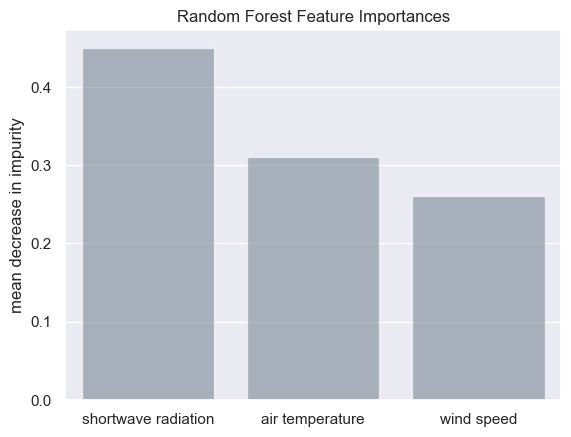

In [62]:
sns.barplot(data=feature_importances, color='lightslategrey', alpha=0.6)
plt.title("Random Forest Feature Importances")
plt.ylabel("mean decrease in impurity")

### Trying to make plots with partial and full unloading, and tree sway, etc for the final regimes groups

In [63]:
df_rr.head()

datetime  shortwave  longwave  windspeed  RH  temp   A   B  CD   E  Type  \
0      NaN        NaN       NaN        NaN NaN   NaN NaN NaN NaN NaN   NaN   
1      NaN        NaN       NaN        NaN NaN   NaN NaN NaN NaN NaN   NaN   
2      NaN        NaN       NaN        NaN NaN   NaN NaN NaN NaN NaN   NaN   
3      NaN        NaN       NaN        NaN NaN   NaN NaN NaN NaN NaN   NaN   
4      NaN        NaN       NaN        NaN NaN   NaN NaN NaN NaN NaN   NaN   

  Class Snow Sunlit Classification  Typesymbol  Snowsymbol site  pressure  \
0   NaN  NaN    NaN            NaN         NaN         NaN  NaN       NaN   
1   NaN  NaN    NaN            NaN         NaN         NaN  NaN       NaN   
2   NaN  NaN    NaN            NaN         NaN         NaN  NaN       NaN   
3   NaN  NaN    NaN            NaN         NaN         NaN  NaN       NaN   
4   NaN  NaN    NaN            NaN         NaN         NaN  NaN       NaN   

   snowdepth  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [64]:
# Class-------------------------------------------------------
# Create symbols for sunlit or not
# State which site we are working with 
df = df_rr.copy(deep=True).dropna(how='all')

# Some constatns 
colorscaled = [[0., colorsnowunload], [1, colorsnow2]]
index_vals = df['CD']
index_symbols = df['Typesymbol']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemperature, values=df['temp']),
                                   dict(label=namewindspeed, values=df['windspeed']),
                                   dict(label=nameshortwave,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale=colorscaled, symbol=index_symbols, showscale=False, line_color='black', line_width=0.5, size=7),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False,
                      ))

fig.update_layout(title='Unloading Regime A', width=800, height=700, dragmode='select')

fig.show()

In [65]:
fig = make_subplots(rows=2, cols=2, 
                    #subplot_titles=("", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.08, horizontal_spacing=0.04,
)

markersize = 8
df = df_ll.copy(deep=True).dropna(how='all')
# df = df_rr.copy(deep=True)

# colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lighter cyan
# colorscaled = [[0., colorsnowunload], [1, colorsnow2]] # the darker cyan
opacity=0.7

colorsnow_light = '#7dcfd4' # VERY LIGHT desaturated cyan
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lightest cyan for the background



# All sites, full scatter matrix
fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1) # full shortwave threshold
# fig.update_yaxes(title_text = nameshortwave, range=[-2,60], row=2, col=1) # new shortwave threshold for group A


fig.add_trace(
    go.Scatter(
        x = df['windspeed'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2) # full shortwave threshold
# fig.update_yaxes(title_text = "", range=[-2,60], row=2, col=2) # new shortwave threshold for group A

fig.update_layout(title='Unloading Regime A', width=900, height=800, showlegend=False)
fig.show()

In [66]:
df = df_ll.copy(deep=True).dropna(how='all')

colorscaled = [[0., colorsnowunload], [1, '#b1e2e5']] # the lighter cyan
# colorscaled = [[0., colorsnowunload], [1, colorsnow2]] # the darker cyan
opacity=0.9

fig = go.Figure(data=go.Scatter(
    x = df['temp'],
    y = df['windspeed'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False, 
        opacity=opacity,
    )
))

fig.update_layout(title='Unloading Regime A', width=550, height=500, dragmode='select')

fig.update_xaxes(title_text = nametemperature, range=[-35,8])
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15])
fig.show()

unloading regime B

In [67]:
fig = make_subplots(rows=2, cols=2, 
                    #subplot_titles=("", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.08, horizontal_spacing=0.04,
)

markersize = 8
df = df_lr.copy(deep=True).dropna(how='all')
# df = df_rr.copy(deep=True)

# colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lighter cyan
# colorscaled = [[0., colorsnowunload], [1, colorsnow2]] # the darker cyan
opacity=0.7

colorsnow_light = '#7dcfd4' # VERY LIGHT desaturated cyan
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lightest cyan for the background



# All sites, full scatter matrix
fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1) # full shortwave threshold
# fig.update_yaxes(title_text = nameshortwave, row=2, col=1) # new shortwave threshold for group A


fig.add_trace(
    go.Scatter(
        x = df['windspeed'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2) # full shortwave threshold
# fig.update_yaxes(title_text = "", range=[-2,60], row=2, col=2) # new shortwave threshold for group A

fig.update_layout(title='Unloading Regime B', width=900, height=800, showlegend=False)
fig.show()

Unloading Regime C

In [68]:
fig = make_subplots(rows=2, cols=2, 
                    #subplot_titles=("", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.08, horizontal_spacing=0.04,
)

markersize = 8
df = df_rl.copy(deep=True).dropna(how='all')
# df = df_rr.copy(deep=True)

# colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lighter cyan
# colorscaled = [[0., colorsnowunload], [1, colorsnow2]] # the darker cyan
opacity=0.7

colorsnow_light = '#7dcfd4' # VERY LIGHT desaturated cyan
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lightest cyan for the background



# All sites, full scatter matrix
fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1) # full shortwave threshold
# fig.update_yaxes(title_text = nameshortwave, row=2, col=1) # new shortwave threshold for group A


fig.add_trace(
    go.Scatter(
        x = df['windspeed'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2) # full shortwave threshold
# fig.update_yaxes(title_text = "", range=[-2,60], row=2, col=2) # new shortwave threshold for group A

fig.update_layout(title='Unloading Regime C', width=900, height=800, showlegend=False)
fig.show()

Unloading Regime D

In [69]:
fig = make_subplots(rows=2, cols=2, 
                    #subplot_titles=("", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.08, horizontal_spacing=0.04,
)

markersize = 8
df = df_rr.copy(deep=True).dropna(how='all')
# df = df_rr.copy(deep=True)

# colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lighter cyan
# colorscaled = [[0., colorsnowunload], [1, colorsnow2]] # the darker cyan
opacity=0.7

colorsnow_light = '#7dcfd4' # VERY LIGHT desaturated cyan
colorscaled = [[0., colorsnowunload], [1, colorsnow]] # the lightest cyan for the background



# All sites, full scatter matrix
fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df['temp'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1) # full shortwave threshold
# fig.update_yaxes(title_text = nameshortwave, row=2, col=1) # new shortwave threshold for group A


fig.add_trace(
    go.Scatter(
        x = df['windspeed'],
        y = df['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df['CD'], 
        colorscale=colorscaled, 
        symbol=df['Typesymbol'],
        showscale=False,
        opacity=opacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2) # full shortwave threshold
# fig.update_yaxes(title_text = "", range=[-2,60], row=2, col=2) # new shortwave threshold for group A

fig.update_layout(title='Unloading Regime D', width=900, height=800, showlegend=False)
fig.show()

In [70]:
df_ll.dropna(how='all', inplace=True)
df_lr.dropna(how='all', inplace=True)
df_rl.dropna(how='all', inplace=True)
df_rr.dropna(how='all', inplace=True)

In [71]:
fig = make_subplots(rows=4, cols=4, 
                    subplot_titles=('Unloading Regime A', "", 'Unloading Regime B', "", 
                                    "", "", "", "", 
                                    "Unloading Regime C", "", "Unloading Regime D", "", 
                                    "", "", "", ""), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.05, horizontal_spacing=0.032,
)

markersize = 5
markeropacity = 0.8

#______________________________________________________________________________
# Decision tree, left left which is group A 
fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=1
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_ll['temp'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=1
)

fig.update_xaxes(range=[-35,8], row=2, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=2, col=1)

fig.add_trace(
    go.Scatter(
        x = df_ll['windspeed'],
        y = df_ll['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_ll['CD'], 
        colorscale=colorscaled, 
        symbol=df_ll['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=2
)

fig.update_xaxes(range=[-.5,15], row=2, col=2) 
fig.update_yaxes(range=[-50,1200], row=2, col=2)

#______________________________________________________________________________
# Decision tree, left right which is group B 
fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=1, col=3
)

fig.update_xaxes(range=[-35,8], row=1, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=1, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_lr['temp'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=3
)

fig.update_xaxes(range=[-35,8], row=2, col=3) 
fig.update_yaxes(range=[-50,1200], row=2, col=3)

fig.add_trace(
    go.Scatter(
        x = df_lr['windspeed'],
        y = df_lr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_lr['CD'], 
        colorscale=colorscaled, 
        symbol=df_lr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=2, col=4
)

fig.update_xaxes(range=[-.5,15], row=2, col=4) 
fig.update_yaxes(range=[-50,1200], row=2, col=4)

#______________________________________________________________________________
# Decision tree right left, which is group C
fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=1
)

fig.update_xaxes(range=[-35,8], row=3, col=1) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=1) 

fig.add_trace(
    go.Scatter(
        x = df_rl['temp'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=1
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=1) 
fig.update_yaxes(title_text = nameshortwave, range=[-50,1200], row=4, col=1)

fig.add_trace(
    go.Scatter(
        x = df_rl['windspeed'],
        y = df_rl['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rl['CD'], 
        colorscale=colorscaled, 
        symbol=df_rl['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=2
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=2) 
fig.update_yaxes(range=[-50,1200], row=4, col=2)

#______________________________________________________________________________
# Decision tree, right right which is group D
fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=3, col=3
)

fig.update_xaxes(range=[-35,8], row=3, col=3) 
fig.update_yaxes(title_text = namewindspeed, range=[-.5,15], row=3, col=3) 

fig.add_trace(
    go.Scatter(
        x = df_rr['temp'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=3
)

fig.update_xaxes(title_text = nametemperature, range=[-35,8], row=4, col=3) 
fig.update_yaxes(range=[-50,1200], row=4, col=3)

fig.add_trace(
    go.Scatter(
        x = df_rr['windspeed'],
        y = df_rr['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_rr['CD'], 
        colorscale=colorscaled, 
        symbol=df_rr['Typesymbol'],
        showscale=False,
        opacity=markeropacity,
        )
    ), row=4, col=4
)

fig.update_xaxes(title_text = namewindspeed, range=[-.5,15], row=4, col=4) 
fig.update_yaxes(range=[-50,1200], row=4, col=4)

fig.update_layout(title='', width=1300, height=1300, showlegend=False)
fig.show()